In [2]:
# Modules

# Load module to create Panda DataFrames in Jupyter Notebooks
import pandas as pd
# Load module to create and format various plots
import matplotlib.pyplot as plt
# Load module to handle high-level math functions and basic algebra
import numpy as np
# Load module to allow communication with HTTPS for API requests
import requests
# Load module that deserializes java script open notation into Jupyter Notebooks
import json
# Load module that returns the number of seconds passed since epoch 
import time
# Load module that contains probability distributions and statistical functions
from scipy.stats import linregress
# Load module to download information from the World Bank databank
import pandas_datareader as pdweb 

In [3]:
# Henry's Fertility CSV:

# Define variable name that holds csv file location of the fertility rates
fertility_csv = "csv_files/Age-specific fertility rates, Total fertility and .csv"
# Define variable name the holds the read information from the csv file
fertility_csv_dataframe = pd.read_csv(fertility_csv)
# Print to screen in Pandas DataFrame the read csv information
fertility_csv_dataframe.head()

,"United Nations, Department of Economic and Social Affairs",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,"Population Division, Fertility and Family Plan...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,World Fertility Data 2012\nAGE-SPECIFIC FERTIL...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country,ISO code,Period,Reference,NaN,Total fertility,Age-specific fertility rates,NaN,NaN,NaN,...,NaN,NaN,Mean age at childbearing,Source type,Source,Survey name,Note on country or population,Note on age,Note on methods,Note on population data used in denominator
3,NaN,NaN,NaN,Year,Period,NaN,15-19,20-24,25-29,30-34,...,40-44,45-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,4,Around 1970,1973,1972-1973,8.21,168,359,355,307,...,137,81,30,Survey,National statistics,Afghanistan 1972-1974 National Demographic and...,NaN,NaN,NaN,NaN


In [4]:
# Henrey's Clean:

# Define variable name that holds drop column information
fertility_clean = fertility_csv_dataframe.drop([0, 1])
# Use pandas column rename function (.columns) to rename the columns in the dataframe
fertility_clean.columns= ['Country', 'ISO Code', 'Period', 'Reference Year', 'Period', 'Total Fertility',
                          'Age-specific fertility rates: 15-19','Age-specific fertility rates: 20-24',
                          'Age-specific fertility rates: 25-29', 'Age-specific fertility rates: 30-34',
                         'Age-specific fertility rates: 35-39','Age-specific fertility rates: 40-44',
                          'Age-specific fertility rates: 45-49', 'Mean Age at Childbearing', 'D1', 'D2', 'D3','D4','D5','D6','D7']
# Drop additional columns from the already cleaned variable
fertility_clean = fertility_clean.drop(columns=['Period','D1','D2','D3','D4','D5','D6','D7'])
fertility_clean = fertility_clean.drop([2, 3])

#reference_years =sorted(fertility_clean['Reference Year'].unique())
#reference_years=fertility_clean["Reference Year"].unique()
#reference_years

# Print to screen the cleaned data variable 'fertility_clean'
fertility_clean.head()

,Country,ISO Code,Reference Year,Total Fertility,Age-specific fertility rates: 15-19,Age-specific fertility rates: 20-24,Age-specific fertility rates: 25-29,Age-specific fertility rates: 30-34,Age-specific fertility rates: 35-39,Age-specific fertility rates: 40-44,Age-specific fertility rates: 45-49,Mean Age at Childbearing
4,Afghanistan,4,1973,8.21,168,359,355,307,235,137,81,30
5,Afghanistan,4,1979,7.11,105,260,309,301,262,185,..,30.7
6,Afghanistan,4,2003,7.52,146,333,350,289,217,143,..,30.1
7,Afghanistan,4,2009,5.11,80,257,262,209,128,60,26,29.1
8,Albania,8,1970,5.16,39,275,266,214,146,69,22,29.7


In [5]:
# Henry's Sort:

# Define variable the holds the sort function of 'Reference Year' from most rescent
last_year=fertility_clean.sort_values('Reference Year', ascending=False).drop_duplicates(['ISO Code'])

reference_years =last_year['Reference Year'].unique()
fertility_clean = fertility_clean.loc[fertility_clean['Total Fertility'] != '..']
fertility_clean = fertility_clean.loc[fertility_clean['Mean Age at Childbearing'] != '..']
fertility_clean['Total Fertility']=fertility_clean['Total Fertility'].astype(float)
fertility_clean['Mean Age at Childbearing']=fertility_clean['Mean Age at Childbearing'].astype(float)
#reference_years=fertility_clean["Reference Year"].unique()
fertility_clean.head()

,Country,ISO Code,Reference Year,Total Fertility,Age-specific fertility rates: 15-19,Age-specific fertility rates: 20-24,Age-specific fertility rates: 25-29,Age-specific fertility rates: 30-34,Age-specific fertility rates: 35-39,Age-specific fertility rates: 40-44,Age-specific fertility rates: 45-49,Mean Age at Childbearing
4,Afghanistan,4,1973,8.21,168,359,355,307,235,137,81,30.0
5,Afghanistan,4,1979,7.11,105,260,309,301,262,185,..,30.7
6,Afghanistan,4,2003,7.52,146,333,350,289,217,143,..,30.1
7,Afghanistan,4,2009,5.11,80,257,262,209,128,60,26,29.1
8,Albania,8,1970,5.16,39,275,266,214,146,69,22,29.7


In [6]:
# Mathew's Change ".." to NaN:

# Define variable that will replace all ".." values in the dataframe to NaN
fertility_clean.replace(r'\s+',np.nan,regex=True).replace('..',np.nan)

,Country,ISO Code,Reference Year,Total Fertility,Age-specific fertility rates: 15-19,Age-specific fertility rates: 20-24,Age-specific fertility rates: 25-29,Age-specific fertility rates: 30-34,Age-specific fertility rates: 35-39,Age-specific fertility rates: 40-44,Age-specific fertility rates: 45-49,Mean Age at Childbearing
4,Afghanistan,4,1973,8.21,168,359,355,307,235,137,81,30.0
5,Afghanistan,4,1979,7.11,105,260,309,301,262,185,NaN,30.7
6,Afghanistan,4,2003,7.52,146,333,350,289,217,143,NaN,30.1
7,Afghanistan,4,2009,5.11,80,257,262,209,128,60,26,29.1
8,Albania,8,1970,5.16,39,275,266,214,146,69,22,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...
1072,Zimbabwe,716,1969,6.74,79,272,304,257,218,145,73,31.2
1073,Zimbabwe,716,1987,5.42,102,251,250,212,158,80,32,29.5
1074,Zimbabwe,716,1998,3.98,112,199,180,135,108,46,15,28.3
1075,Zimbabwe,716,2004,3.80,99,205,172,144,86,42,13,28.1


In [7]:
# Mathew's Change "NaN" to zero:

# Use already defined variable and replace all "NaN" values in the dataframe to zero
fertility_clean["Age-specific fertility rates: 45-49"] = fertility_clean["Age-specific fertility rates: 45-49"].apply(pd.to_numeric, errors='coerce').fillna(0, downcast='infer')
fertility_clean["Age-specific fertility rates: 40-44"] = fertility_clean["Age-specific fertility rates: 40-44"].apply(pd.to_numeric, errors='coerce').fillna(0, downcast='infer')
fertility_clean["Age-specific fertility rates: 35-39"] = fertility_clean["Age-specific fertility rates: 35-39"].apply(pd.to_numeric, errors='coerce').fillna(0, downcast='infer')
fertility_clean["Age-specific fertility rates: 30-34"] = fertility_clean["Age-specific fertility rates: 30-34"].apply(pd.to_numeric, errors='coerce').fillna(0, downcast='infer')
fertility_clean["Age-specific fertility rates: 25-29"] = fertility_clean["Age-specific fertility rates: 25-29"].apply(pd.to_numeric, errors='coerce').fillna(0, downcast='infer')
fertility_clean["Age-specific fertility rates: 20-24"] = fertility_clean["Age-specific fertility rates: 20-24"].apply(pd.to_numeric, errors='coerce').fillna(0, downcast='infer')
fertility_clean["Age-specific fertility rates: 15-19"] = fertility_clean["Age-specific fertility rates: 15-19"].apply(pd.to_numeric, errors='coerce').fillna(0, downcast='infer')

fertility_clean.head()

,Country,ISO Code,Reference Year,Total Fertility,Age-specific fertility rates: 15-19,Age-specific fertility rates: 20-24,Age-specific fertility rates: 25-29,Age-specific fertility rates: 30-34,Age-specific fertility rates: 35-39,Age-specific fertility rates: 40-44,Age-specific fertility rates: 45-49,Mean Age at Childbearing
4,Afghanistan,4,1973,8.21,168,359,355,307,235,137,81,30.0
5,Afghanistan,4,1979,7.11,105,260,309,301,262,185,0,30.7
6,Afghanistan,4,2003,7.52,146,333,350,289,217,143,0,30.1
7,Afghanistan,4,2009,5.11,80,257,262,209,128,60,26,29.1
8,Albania,8,1970,5.16,39,275,266,214,146,69,22,29.7


In [8]:
fertility_clean['Age-specific fertility rates: 40-44'].isnull().sum()

0

In [9]:
fertility_clean.nunique()

Country                                223
ISO Code                               223
Reference Year                          50
Total Fertility                        482
Age-specific fertility rates: 15-19    198
Age-specific fertility rates: 20-24    308
Age-specific fertility rates: 25-29    287
Age-specific fertility rates: 30-34    277
Age-specific fertility rates: 35-39    240
Age-specific fertility rates: 40-44    149
Age-specific fertility rates: 45-49     80
Mean Age at Childbearing                82
dtype: int64

In [10]:
# Mathew's Drop Duplicates:

# Define variable name that drops the duplicate country names 
fertility_drop_duplicate_countries = fertility_clean.sort_values('Reference Year').drop_duplicates('Country',keep='last')
fertility_drop_duplicate_countries.head()

,Country,ISO Code,Reference Year,Total Fertility,Age-specific fertility rates: 15-19,Age-specific fertility rates: 20-24,Age-specific fertility rates: 25-29,Age-specific fertility rates: 30-34,Age-specific fertility rates: 35-39,Age-specific fertility rates: 40-44,Age-specific fertility rates: 45-49,Mean Age at Childbearing
821,Saint Pierre and Miquelon,666,1977,2.01,45,148,92,60,41,15,0,26.9
966,Tokelau,772,1986,3.72,40,183,219,181,67,55,0,29.0
1045,Vanuatu,548,1989,4.88,78,234,248,195,138,61,22,29.3
222,Comoros,174,1994,4.66,59,184,223,226,147,67,25,30.3
963,Togo,768,1996,5.20,89,214,246,207,166,82,37,30.1


In [11]:
# Cindy's Literacy CSV:

# Define variable name that holds the csv file location of the literacy rates
file_literacy = "csv_files/literacy-rate-adults.csv"
# Define variable name that holds the read information from the csv
literacy_df = pd.read_csv(file_literacy)
# Print to screen, in Pandas DataFrame, the read csv information
literacy_df.head()

,Entity,Code,Year,"Literacy rate, adult total (% of people ages 15 and above)"
0,Afghanistan,AFG,1979,18.157681
1,Afghanistan,AFG,2011,31.741119
2,Albania,ALB,2001,98.712982
3,Albania,ALB,2008,95.938637
4,Albania,ALB,2011,96.845299


In [12]:
# Cindy's Change Name:

# change field name in literacy rate to literacy_rate
literacy_df.columns = ["Country", "Code", "Reference Year", "Literacy Rate"]
literacy_df['Reference Year']=literacy_df['Reference Year'].astype(str)
literacy_df.head()

,Country,Code,Reference Year,Literacy Rate
0,Afghanistan,AFG,1979,18.157681
1,Afghanistan,AFG,2011,31.741119
2,Albania,ALB,2001,98.712982
3,Albania,ALB,2008,95.938637
4,Albania,ALB,2011,96.845299


In [13]:
literacy_df['Literacy Rate'].isnull().sum()

0

In [14]:
# Mathew's Drop Duplicates:

# Define variable name that holds drop duplicate countries from the literacy csv
literacy_drop_duplicate_countries = literacy_df.sort_values('Reference Year').drop_duplicates('Country',keep='last')
literacy_drop_duplicate_countries.head()

,Country,Code,Reference Year,Literacy Rate
657,Grenada,GRD,1970,97.794472
83,Barbados,BRB,1970,99.268082
1751,Saint Vincent and the Grenadines,VCT,1970,95.632156
1691,Poland,POL,1978,98.742737
715,Hungary,HUN,1980,98.858292


In [15]:
literacy_drop_duplicate_countries.nunique()

Country           204
Code              163
Reference Year     28
Literacy Rate     201
dtype: int64

In [16]:
# Mathew's Literacy and Fertility Merge:

# Define variable that holds the drop duplicate country variable for both fertility and literacy
fertility_literacy_dataset = pd.merge(fertility_drop_duplicate_countries, literacy_drop_duplicate_countries, left_on="Country", right_on="Country")
fertility_literacy_dataset.head()

,Country,ISO Code,Reference Year_x,Total Fertility,Age-specific fertility rates: 15-19,Age-specific fertility rates: 20-24,Age-specific fertility rates: 25-29,Age-specific fertility rates: 30-34,Age-specific fertility rates: 35-39,Age-specific fertility rates: 40-44,Age-specific fertility rates: 45-49,Mean Age at Childbearing,Code,Reference Year_y,Literacy Rate
0,Vanuatu,548,1989,4.88,78,234,248,195,138,61,22,29.3,VUT,1999,74.000000
1,Comoros,174,1994,4.66,59,184,223,226,147,67,25,30.3,COM,2012,49.196140
2,Togo,768,1996,5.20,89,214,246,207,166,82,37,30.1,TGO,2015,63.745621
3,Gabon,266,1999,4.22,142,196,177,172,100,48,8,27.9,GAB,2012,82.283798
4,Eritrea,232,2000,4.78,77,185,204,188,167,88,46,30.8,ERI,2008,64.662971


In [17]:
fertility_literacy_dataset.nunique()

Country                                146
ISO Code                               146
Reference Year_x                        16
Total Fertility                        120
Age-specific fertility rates: 15-19     92
Age-specific fertility rates: 20-24    114
Age-specific fertility rates: 25-29    105
Age-specific fertility rates: 30-34    101
Age-specific fertility rates: 35-39     96
Age-specific fertility rates: 40-44     68
Age-specific fertility rates: 45-49     39
Mean Age at Childbearing                59
Code                                   145
Reference Year_y                        26
Literacy Rate                          145
dtype: int64

In [18]:
# Mathew's Top Ten Fertility from merge:

# Define variable that holds the top ten to total fertility
top_ten_fertility_merge = fertility_literacy_dataset.sort_values(['Total Fertility', 'Country'], ascending=False).groupby('Total Fertility').head(5)
top_ten_fertility_merge.head(5)

,Country,ISO Code,Reference Year_x,Total Fertility,Age-specific fertility rates: 15-19,Age-specific fertility rates: 20-24,Age-specific fertility rates: 25-29,Age-specific fertility rates: 30-34,Age-specific fertility rates: 35-39,Age-specific fertility rates: 40-44,Age-specific fertility rates: 45-49,Mean Age at Childbearing,Code,Reference Year_y,Literacy Rate
6,Guinea-Bissau,624,2000,7.36,170,302,328,288,210,144,30,29.6,GNB,2014,45.581161
20,Niger,562,2004,7.02,199,300,298,267,207,93,39,29.0,NER,2012,15.456700
28,Mali,466,2005,6.57,188,283,292,255,180,91,25,28.8,MLI,2015,33.068890
88,Burundi,108,2009,6.38,65,281,302,269,225,104,31,30.4,BDI,2014,61.569729
15,Chad,148,2003,6.34,187,295,275,263,163,73,13,28.3,TCD,2016,22.311550


In [19]:
# Mathew's Top Ten Literacy from merge:

top_ten_literacy_merge = fertility_literacy_dataset.sort_values(['Literacy Rate', 'Country'], ascending=False).groupby('Literacy Rate').head(5)
top_ten_literacy_merge.head(5)

,Country,ISO Code,Reference Year_x,Total Fertility,Age-specific fertility rates: 15-19,Age-specific fertility rates: 20-24,Age-specific fertility rates: 25-29,Age-specific fertility rates: 30-34,Age-specific fertility rates: 35-39,Age-specific fertility rates: 40-44,Age-specific fertility rates: 45-49,Mean Age at Childbearing,Code,Reference Year_y,Literacy Rate
143,Greenland,304,2011,2.07,41,104,117,98,49,5,0,27.8,GRL,2015,100.000000
134,Andorra,20,2010,1.25,4,34,75,81,45,10,1,30.8,AND,2016,100.000000
40,Uzbekistan,860,2006,2.44,26,186,161,81,28,6,0,26.7,UZB,2015,99.983833
64,Ukraine,804,2007,1.35,30,94,79,46,17,3,0,26.3,UKR,2012,99.974350
139,Latvia,428,2010,1.17,17,49,74,57,28,7,0,28.6,LVA,2011,99.895897


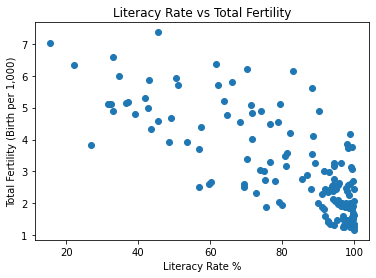

In [20]:
# Henry's Scatter Plot With Mathew's Updated Datapoints (146):

# Use Matplotlib to create scatter plot and format
plt.scatter(fertility_literacy_dataset["Literacy Rate"],
           fertility_literacy_dataset["Total Fertility"], marker="o")
# Create a unique plot title
plt.title('Literacy Rate vs Total Fertility')
# Create a lable for the y axis
plt.ylabel("Total Fertility (Birth per 1,000)")
# Create a lable for the x axis
plt.xlabel("Literacy Rate %")
# Save a png image of the scatter plot to local folder
plt.savefig('literacy_rates_vs_total_fertility')
# Print scatter plot to screen
plt.show()

#### Scatter Plot Observation:
This is a scatter plot that shows the correlation between the total fertility of births per thousand and the overall literacy rate.  It looks like there is some correlation between the two as the fertility datapoints decrease as the literacty rate increases.  We might be able to get more data points to confirm this.

In [21]:
# Henry's Linear Regression Passthrough:

# Use Python define function (def) to start a linear regression function 
def plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"The r-squared is: {rvalue}")
    print(f"Intercept: {intercept}")
    literacy_rate_opt = (2.1-intercept)/slope
    print(f"Literacy Rate: {literacy_rate_opt}")
    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=20,color="black")
    #plt.hlines(y=2.1,color="gray",xmin=15, xmax=105)
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.show()

The r-squared is: -0.7698049493318533
Intercept: 7.5016473532450885
Literacy Rate: 99.80282701977282


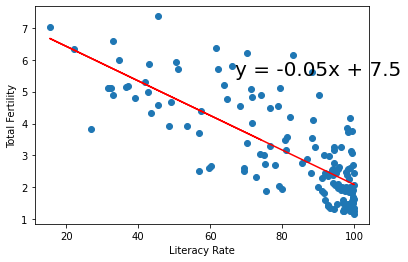

In [22]:
# Henry's Linear Regression With Mathew's Updated Datapoints (146):

# Define variable that holds the x-axis label
xlbl = "Literacy Rate"
# Define variable that holds the y-axis label
ylbl = "Total Fertility"
lblpos = (67,5.5)
plotLinearRegression(fertility_literacy_dataset[xlbl],fertility_literacy_dataset[ylbl],xlbl,ylbl,lblpos)

#### Linear Regression Observation:
This linear regression line shows that there is a strong correlation between the fertility rate and literacy rates.  It might be helpful to compare other factors to the fertility rate such as age, country and income to see how they compare.

## How has the age of childbearing changed over time?

In [23]:
# Mathew's Age Specific DataFrame Mean:

# Define variables the will hold the mean values for age specific columns
age_15_19 = fertility_literacy_dataset["Age-specific fertility rates: 15-19"].mean()
age_20_24 = fertility_literacy_dataset["Age-specific fertility rates: 20-24"].mean()
age_25_29 = fertility_literacy_dataset["Age-specific fertility rates: 25-29"].mean()
age_30_34 = fertility_literacy_dataset["Age-specific fertility rates: 30-34"].mean()
age_35_39 = fertility_literacy_dataset["Age-specific fertility rates: 35-39"].mean()
age_40_44 = fertility_literacy_dataset["Age-specific fertility rates: 40-44"].mean()
age_45_49 = fertility_literacy_dataset["Age-specific fertility rates: 45-49"].mean()

bar_chart_dataframe = pd.DataFrame({"Age 15-19":[age_15_19], "Age 20-24":[age_20_24], "Age 25-29":[age_25_29],
                                   "Age 30-34":[age_30_34], "Age 35-39":[age_35_39], "Age 40-44":[age_40_44], "Age 45-49":[age_45_49]}) 
bar_chart_dataframe

,Age 15-19,Age 20-24,Age 25-29,Age 30-34,Age 35-39,Age 40-44,Age 45-49
0,62.541096,144.80137,158.390411,129.650685,83.835616,34.945205,10.034247


#### Bar Chart: Mean Fertility Rates amoung Age Specific Groups

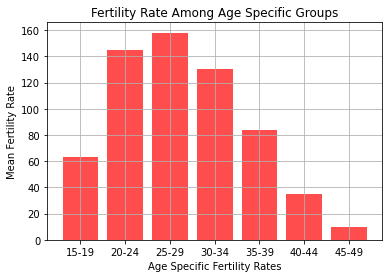

In [24]:
# Mathew's Age Specific Mean Bar Chart:

# Define base chart properties
# Define variable for the name of the cities "city_names"
age_specific_fertility = ["15-19", "20-24", "25-29", "30-34", "35-39", "40-44", "45-49"]
# Define variable for plot points that correspond to the city names
age_specific_mean = [63, 145, 158, 130, 84, 35, 10]
# Use numpy libraries built in function arange (np.arange) to build a graph
x_axis_age_specific = np.arange(len(age_specific_mean))
plt.bar(x_axis_age_specific, age_specific_mean, color="r", alpha=0.7, align="center")
plt.grid()
# Define variable that holds tick value placement in a chart on x_axis_np chart
chart_ticks = [value for value in x_axis_age_specific]
# Now, use the function to call the defined variables "chart_ticks" and "city_names"
plt.xticks(chart_ticks, age_specific_fertility)
plt.title("Fertility Rate Among Age Specific Groups")
plt.xlabel("Age Specific Fertility Rates")
plt.ylabel("Mean Fertility Rate")
plt.savefig('Mean_Fertility_Rate_All_Countries')
plt.show()

#### Observation:
This chart shows the total mean fertility rate of each age bracket for all countries.  The chart shows that the largest mean categories are categories 20-24, 25-29 and 30-34.  This will be a good sample to pull top/bottom fertility from to address other questions about this topic.  